In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지  기타사항
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0   NaN
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0   NaN
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0   NaN
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0   NaN
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0   NaN

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [7]:
print('컬럼별 결측치 개수')
len(trade) - trade.count() #전체 데이터 갯수 - 컬럼별 데이터 건수 = 각 컬럼별 갯수차이
# trade.count() #컬럼별 데이터 건수 

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [8]:
trade = trade.drop('기타사항', axis=1)

In [9]:
trade.head()

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0

In [10]:
trade.isnull() # 결측치 반환

기간    국가명   수출건수   수출금액   수입건수   수입금액   무역수지
0    False  False  False  False  False  False  False
1    False  False  False  False  False  False  False
2    False  False  False  False  False  False  False
3    False  False  False  False  False  False  False
4    False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...
194  False  False  False  False  False  False  False
195  False  False  False  False  False  False  False
196  False  False   True   True   True   True   True
197  False  False   True   True   True   True   True
198  False  False   True   True   True   True   True

[199 rows x 7 columns]

In [13]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [14]:
trade[trade.isnull().any(axis=1)]

기간 국가명      수출건수  수출금액       수입건수       수입금액  무역수지
191  2020년 04월  미국  105360.0   NaN  1141118.0  5038739.0   NaN
196  2020년 06월  중국       NaN   NaN        NaN        NaN   NaN
197  2020년 06월  미국       NaN   NaN        NaN        NaN   NaN
198  2020년 06월  일본       NaN   NaN        NaN        NaN   NaN

In [15]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [16]:
trade

기간 국가명      수출건수        수출금액       수입건수       수입금액       무역수지
0    2015년 01월  중국  116932.0  12083947.0   334522.0  8143271.0  3940676.0
1    2015년 01월  미국   65888.0   5561545.0   509564.0  3625062.0  1936484.0
2    2015년 01월  일본   54017.0   2251307.0    82480.0  3827247.0 -1575940.0
3    2015년 02월  중국   86228.0   9927642.0   209100.0  6980874.0  2946768.0
4    2015년 02월  미국   60225.0   5021264.0   428678.0  2998216.0  2023048.0
..         ...  ..       ...         ...        ...        ...        ...
191  2020년 04월  미국  105360.0         NaN  1141118.0  5038739.0        NaN
192  2020년 04월  일본  134118.0   1989323.0   141207.0  3989562.0 -2000239.0
193  2020년 05월  중국  185320.0  10746069.0   349007.0  8989920.0  1756149.0
194  2020년 05월  미국  126598.0   4600726.0  1157163.0  4286873.0   313853.0
195  2020년 05월  일본  166568.0   1798128.0   133763.0  3102734.0 -1304606.0

[196 rows x 7 columns]

In [17]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

기간 국가명      수출건수       수출금액       수입건수       수입금액       무역수지
188  2020년 03월  미국   97117.0  7292838.0  1368345.0  5388338.0  1904500.0
194  2020년 05월  미국  126598.0  4600726.0  1157163.0  4286873.0   313853.0

In [18]:
trade.loc[191,'수출금액']=(trade.loc[188,'수출금액']+trade.loc[194,'수출금액'])/2

In [19]:
trade.loc[[191]]

기간 국가명      수출건수       수출금액       수입건수       수입금액  무역수지
191  2020년 04월  미국  105360.0  5946782.0  1141118.0  5038739.0   NaN

In [23]:
trade.loc[191,'무역수지']=(trade.loc[188,'수출금액']-trade.loc[194,'수입금액'])
trade.loc[[191]]

기간 국가명      수출건수       수출금액       수입건수       수입금액       무역수지
191  2020년 04월  미국  105360.0  5946782.0  1141118.0  5038739.0  3005965.0

In [24]:
#5-3 중복된 데이터


In [25]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [26]:
trade[trade.duplicated()]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
187  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0

In [27]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
186  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0
187  2020년 03월  중국  248059.0  10658599.0  358234.0  8948918.0  1709682.0

In [28]:
trade.drop_duplicates(inplace=True)

In [81]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df.copy()

id      name
0  001  Park Yun
1  002  Kim Sung
2  003  Park Jin
3  004   Lee Han
4  002   Kim Min

In [82]:
df= df.drop_duplicates(subset=['id'], keep='last')
df.sort_values('id', inplace=True)


In [83]:
df

id      name
0  001  Park Yun
4  002   Kim Min
2  003  Park Jin
3  004   Lee Han

In [95]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col])>z].index


In [96]:
trade.loc[outlier(trade, '무역수지', 1.5)]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
6    2015년 03월  중국  117529.0  11868032.0  234321.0  7226911.0  4641121.0
80   2017년 03월  일본   65093.0   2395932.0  165734.0  5157589.0 -2761657.0
96   2017년 09월  중국  183442.0  13540683.0  295443.0  8443414.0  5097269.0
99   2017년 10월  중국  137873.0  12580474.0  244977.0  7932403.0  4648071.0
101  2017년 10월  일본   63510.0   1847999.0  127696.0  4418583.0 -2570584.0
102  2017년 11월  중국  421194.0  14000887.0  307790.0  9253318.0  4747569.0
105  2017년 12월  중국  218114.0  13848364.0  290347.0  8600132.0  5248232.0
114  2018년 03월  중국  232396.0  13576667.0  267249.0  8412516.0  5164151.0
116  2018년 03월  일본   80142.0   2603450.0  159601.0  5226141.0 -2622691.0
120  2018년 05월  중국  214145.0  13851900.0  307183.0  9279720.0  4572180.0
123  2018년 06월  중국  257130.0  13814241.0  279023.0  8713018.0  5101223.0
126  2018년 07월  중국  181772.0  13721233.0  293164.0  8869278.0  4851955.0
129  2018년 08월  중국  199010.0  14401521.0  280033.0  8525532.0  5875989.0
132  2018년 09월  중국  171328.0  14590529.0  280337.0  7889890.0  6700639.0
135  2018년 10월  중국  169809.0  14767041.0  319876.0  9963108.0  4803932.0

In [104]:
trade.loc[outlier(trade, '무역수지', 2)]

기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
129  2018년 08월  중국  199010.0  14401521.0  280033.0  8525532.0  5875989.0
132  2018년 09월  중국  171328.0  14590529.0  280337.0  7889890.0  6700639.0

In [105]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

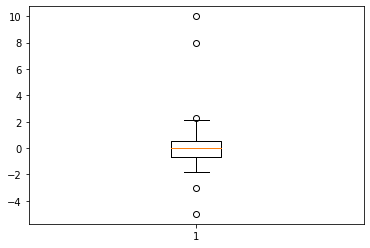

In [107]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [108]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
def outlier2(df, col):
    Q3, Q1 = np.percentile(data, [75 ,25])
    IQR = Q3 - Q1
    upper = Q1+1.5*IQR
    lower = Q3-1.5*IQR
    out = df[(df[col] < lower) | (df[col] > upper) ]
  
    return out
outlier2(trade, '무역수지')

기간 국가명      수출건수        수출금액       수입건수       수입금액       무역수지
0    2015년 01월  중국  116932.0  12083947.0   334522.0  8143271.0  3940676.0
1    2015년 01월  미국   65888.0   5561545.0   509564.0  3625062.0  1936484.0
2    2015년 01월  일본   54017.0   2251307.0    82480.0  3827247.0 -1575940.0
3    2015년 02월  중국   86228.0   9927642.0   209100.0  6980874.0  2946768.0
4    2015년 02월  미국   60225.0   5021264.0   428678.0  2998216.0  2023048.0
..         ...  ..       ...         ...        ...        ...        ...
191  2020년 04월  미국  105360.0   5946782.0  1141118.0  5038739.0  3005965.0
192  2020년 04월  일본  134118.0   1989323.0   141207.0  3989562.0 -2000239.0
193  2020년 05월  중국  185320.0  10746069.0   349007.0  8989920.0  1756149.0
194  2020년 05월  미국  126598.0   4600726.0  1157163.0  4286873.0   313853.0
195  2020년 05월  일본  166568.0   1798128.0   133763.0  3102734.0 -1304606.0

[195 rows x 7 columns]

In [109]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

A         B
0   6.205792 -1.485248
1  -0.604047 -0.727779
2   3.018785 -0.517099
3   3.323325 -0.414949
4   6.167679 -0.582630
..       ...       ...
95  5.062917 -1.122239
96 -0.166839 -2.487547
97 -4.230178  0.589513
98 -0.562115  0.779614
99  5.984528 -1.724450

[100 rows x 2 columns]

In [110]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x-x.mean())/x.std()
x_standardization

A         B
0   0.559307 -0.314995
1  -1.132240  0.407499
2  -0.232338  0.608450
3  -0.156691  0.705884
4   0.549839  0.545945
..       ...       ...
95  0.275419  0.031252
96 -1.023639 -1.271014
97 -2.032961  1.663966
98 -1.121824  1.845290
99  0.504345 -0.543153

[100 rows x 2 columns]

In [111]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

A         B
0   0.607216  0.426240
1   0.267692  0.571821
2   0.448318  0.612312
3   0.463502  0.631944
4   0.605316  0.599717
..       ...       ...
95  0.550235  0.496008
96  0.289490  0.233606
97  0.086901  0.824995
98  0.269782  0.861531
99  0.596184  0.380268

[100 rows x 2 columns]

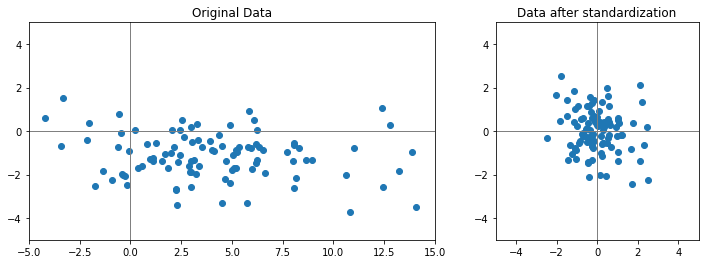

In [112]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

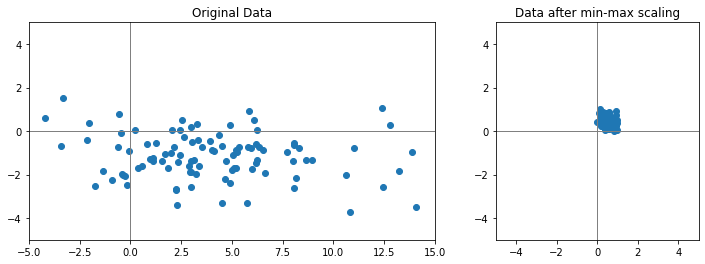

In [113]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()


In [114]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

수출건수      수출금액      수입건수      수입금액      무역수지
0 -0.007488  1.398931 -0.163593  1.283660  1.249403
1 -0.689278 -0.252848  0.412529 -0.964444  0.395753
2 -0.847838 -1.091156 -0.993148 -0.863844 -1.100303
3 -0.417598  0.852853 -0.576399  0.705292  0.826066
4 -0.764918 -0.389673  0.146306 -1.276341  0.432623

In [115]:
trade_standardization.describe()


수출건수          수출금액          수입건수          수입금액          무역수지
count  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02
mean  -1.093143e-16  6.832142e-17  1.821904e-17 -5.465713e-17 -4.554761e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -9.194976e-01 -1.231761e+00 -9.984408e-01 -1.276341e+00 -1.605338e+00
25%   -5.937426e-01 -1.041338e+00 -7.673625e-01 -7.911669e-01 -1.119253e+00
50%   -4.373265e-01 -1.564700e-01 -3.429346e-01 -4.137392e-01  1.639715e-01
75%    4.420459e-01  1.037200e+00  3.927781e-01  8.827841e-01  7.514119e-01
max    5.486317e+00  2.078416e+00  3.239068e+00  2.376092e+00  2.424961e+00

In [116]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

기간 국가명      수출건수      수출금액      수입건수      수입금액      무역수지
0  2015년 01월  중국  0.142372  0.794728  0.197014  0.700903  0.708320
1  2015년 01월  미국  0.035939  0.295728  0.332972  0.085394  0.496512
2  2015년 01월  일본  0.011187  0.042477  0.001249  0.112938  0.125310
3  2015년 02월  중국  0.078351  0.629759  0.099597  0.542551  0.603281
4  2015년 02월  미국  0.024131  0.254394  0.270146  0.000000  0.505660

In [117]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [118]:
# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다.
train_min_max = (train-train.min())/(train.max()-train.min())
test_min_max = (test-train.min())/(train.max()-train.min())
print("💫 It's okay, no biggie...")

💫 It's okay, no biggie...


In [119]:
train_min_max

0    1
0  0.0  0.0
1  0.5  1.0
2  1.0  0.5

In [120]:
test_min_max

0     1
0 -0.25  0.55
1  0.00  1.00

In [121]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [122]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [123]:
scaler.transform(test)

array([[-0.25,  0.55]])

In [124]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


미국  일본  중국
0   0   0   1
1   1   0   0
2   0   1   0
3   0   0   1
4   1   0   0

In [125]:
trade = pd.concat([trade, country], axis=1)
trade.head()

기간 국가명      수출건수      수출금액      수입건수      수입금액      무역수지  미국  일본  중국
0  2015년 01월  중국  0.142372  0.794728  0.197014  0.700903  0.708320   0   0   1
1  2015년 01월  미국  0.035939  0.295728  0.332972  0.085394  0.496512   1   0   0
2  2015년 01월  일본  0.011187  0.042477  0.001249  0.112938  0.125310   0   1   0
3  2015년 02월  중국  0.078351  0.629759  0.099597  0.542551  0.603281   0   0   1
4  2015년 02월  미국  0.024131  0.254394  0.270146  0.000000  0.505660   1   0   0

In [126]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

기간      수출건수      수출금액      수입건수      수입금액      무역수지  미국  일본  중국
0  2015년 01월  0.142372  0.794728  0.197014  0.700903  0.708320   0   0   1
1  2015년 01월  0.035939  0.295728  0.332972  0.085394  0.496512   1   0   0
2  2015년 01월  0.011187  0.042477  0.001249  0.112938  0.125310   0   1   0
3  2015년 02월  0.078351  0.629759  0.099597  0.542551  0.603281   0   0   1
4  2015년 02월  0.024131  0.254394  0.270146  0.000000  0.505660   1   0   0

In [ ]:
# 위의 내용을 배웠지만 모든 데이터에 일괄적으로 적용해야 하는 것은 아닙니다. 데이터 전처리는 데이터의 특성을 파악해서 해야 합니다. 그래서 다소 번거롭게 느껴질 수 있지만 꼭 해야 하는 과정인 만큼 복습해 보시기를 권합니다. 남는 시간 동안 아래 데이터셋의 전처리 과정을 진행해 보세요.

# vgsales.csv
# 들어가며 스텝에서 정상적으로 심볼릭 링크를 거셨다면 이미 여러분의 실습 폴더 ~/aiffel/data_preprocess/data 로 옮겨져있을 것입니다.

# 위 데이터의 출처는 캐글의 Video Game Sales 데이터셋입니다. 16,500개 이상의 비디오 게임에 대한 매출 정보 등이 담겨 있습니다. 혹시 게임을 좋아하시는 분께는 아주 흥미로운 데이터셋이 될지도 모르겠습니다. 위에 언급된 전처리 기법 중 다수를 시도해 볼 수 있는 데이터셋이므로, 오늘 배운 기법들이 본인의 것이 될 수 있도록 복습을 통해 다시 한번 개념을 다져보시기를 권합니다.

# 이외에도 여러분이 가진 표 데이터를 직접 전처리해 보시면 더욱 흥미롭게 하실 수 있습니다. 데이터가 없다면 공공데이터포털, 캐글에서 관심 있는 분야의 데이터를 찾아보시기 바랍니다.

# 수고하셨습니다! 🛸